In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Dosya yolları
train_file = "/kaggle/input/data-set/train.csv"
test_file = "/kaggle/input/data-set/test.csv"

# Veri setlerini yükleme
train_data = pd.read_csv(train_file)
test_data = pd.read_csv(test_file)

# Veriyi ayır
X = train_data.drop('label', axis=1).values.reshape(-1, 28, 28, 1) / 255.0
y = to_categorical(train_data['label'])

# Eğitim ve doğrulama verisine böl
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Eğitim veri şekli: {X_train.shape}, Doğrulama veri şekli: {X_val.shape}")


Eğitim veri şekli: (33600, 28, 28, 1), Doğrulama veri şekli: (8400, 28, 28, 1)


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import mnist

# MNIST veri setini yükle
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Veriyi normalizasyon yap
X_train = X_train / 255.0
X_test = X_test / 255.0

# Etiketleri one-hot encode et
y_train = to_categorical(y_train, 10)  # 10 sınıf (0-9)
y_test = to_categorical(y_test, 10)

# Eğitim ve doğrulama verilerine böl
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Modeli tanımlama
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Görüntüleri düzleştir
    Dense(512, activation='relu'),  # İlk gizli katman
    Dropout(0.3),  # Dropout ile aşırı öğrenmeyi önle
    Dense(256, activation='relu'),  # İkinci gizli katman
    Dropout(0.3),
    Dense(10, activation='softmax')  # Çıkış katmanı (10 sınıf için)
])

# Modeli derle
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Modeli eğit
history = model.fit(
    X_train, y_train,  # Giriş ve etiketler
    validation_data=(X_val, y_val),  # Doğrulama verisi
    epochs=32,
    batch_size=128
)

# Modelin doğruluğunu test verisi üzerinde değerlendirme
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Test doğruluğu: {test_accuracy:.4f}")


Epoch 1/32
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.8230 - loss: 0.5808 - val_accuracy: 0.9601 - val_loss: 0.1304
Epoch 2/32
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9577 - loss: 0.1401 - val_accuracy: 0.9694 - val_loss: 0.1041
Epoch 3/32
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9687 - loss: 0.1030 - val_accuracy: 0.9732 - val_loss: 0.0882
Epoch 4/32
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9757 - loss: 0.0742 - val_accuracy: 0.9773 - val_loss: 0.0774
Epoch 5/32
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9800 - loss: 0.0623 - val_accuracy: 0.9786 - val_loss: 0.0730
Epoch 6/32
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9827 - loss: 0.0524 - val_accuracy: 0.9789 - val_loss: 0.0723
Epoch 7/32
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9861 - loss: 0.0431 - val_accuracy: 0.9814 - val_loss: 0.0670
Epoch 8/32
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9869 - loss: 0.0396 - val_accurac

In [3]:
import os
print(os.getcwd())


/kaggle/working


In [5]:
model.save('/kaggle/working/digit_recognizer_model_v2.h5')


In [8]:
#tahmin kodu 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model

# Modeli tanımlama
model = Sequential([
    # İlk katman: Giriş şekli tanımlandı
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # 10 sınıf (0-9 rakamları)
])

# Modeli derleme
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Veriyi ayır
X = train_data.drop('label', axis=1).values.reshape(-1, 28, 28, 1) / 255.0  # 784'ü 28x28'e yeniden şekillendiriyoruz
y = to_categorical(train_data['label'])

# Eğitim ve doğrulama verisine böl
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Eğitim veri şekli: {X_train.shape}, Doğrulama veri şekli: {X_val.shape}")

# Modeli eğitme
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=5, batch_size=32)

# Eğitim tamamlandıktan sonra model kaydedilebilir (isteğe bağlı)
# model.save('digit_recognizer_model.h5')

# Test verisi üzerinde tahmin yapma
test_images = test_data.values.reshape(-1, 28, 28, 1) / 255.0  # Test verisini uygun şekilde hazırlama
predictions = model.predict(test_images)

# Tahmin edilen sınıfları almak
predicted_classes = predictions.argmax(axis=1)

# Tahminleri yazdırma
print("Tahmin edilen sınıflar:", predicted_classes)


Eğitim veri şekli: (33600, 28, 28, 1), Doğrulama veri şekli: (8400, 28, 28, 1)
Epoch 1/5
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 18ms/step - accuracy: 0.8819 - loss: 0.3906 - val_accuracy: 0.9785 - val_loss: 0.0669
Epoch 2/5
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 18ms/step - accuracy: 0.9826 - loss: 0.0574 - val_accuracy: 0.9802 - val_loss: 0.0643
Epoch 3/5
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 17ms/step - accuracy: 0.9879 - loss: 0.0372 - val_accuracy: 0.9860 - val_loss: 0.0428
Epoch 4/5
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 18ms/step - accuracy: 0.9918 - loss: 0.0245 - val_accuracy: 0.9829 - val_loss: 0.0568
Epoch 5/5
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 17ms/step - accuracy: 0.9938 - loss: 0.0198 - val_accuracy: 0.9877 - val_loss: 0.0400
875/875 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step
Tahmin edilen sınıflar: [2 0 9 ... 3 9 2]


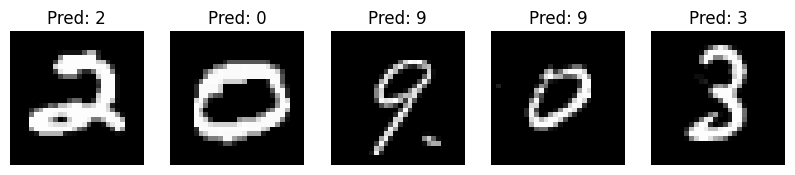

In [16]:
import matplotlib.pyplot as plt
#tahmin edilen sınıfların görselleştirilmesi 
# Görselleştirme: İlk 5 test görüntüsünü ve tahminlerini görselleştirme
plt.figure(figsize=(10, 10))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')  # Test görüntüsünü reshape et
    plt.title(f"Pred: {predicted_classes[i]}")  # Tahmin edilen sınıfı başlık olarak göster
    plt.axis('off')  # Eksenleri gizle
plt.show()


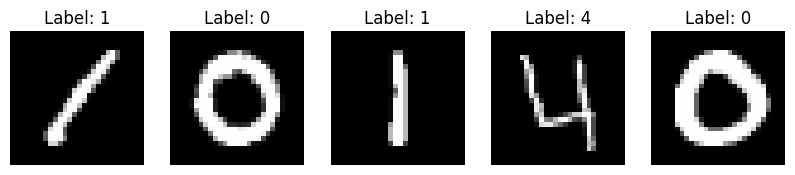

In [9]:
#veri setinin görselleştirilmesi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Eğitim veri setini yükle
train_file = "/kaggle/input/data-set/train.csv"
train_data = pd.read_csv(train_file)

# Veriyi ön işleme
X = train_data.drop('label', axis=1).values  # Etiket hariç her şey (piksel değerleri)
y = train_data['label'].values  # Etiketler (0-9 arasındaki rakamlar)

# Veriyi normalize etme (piksel değerlerini 0-1 arasında)
X = X / 255.0

# Görüntüleri 28x28 boyutlarına dönüştürme ve yeniden şekillendirme
X = X.reshape(-1, 28, 28, 1)  # Her görüntü 28x28 boyutunda ve 1 kanal (grayscale)

# Görüntüleme: İlk 5 görüntüyü ve etiketlerini görselleştirme
plt.figure(figsize=(10, 10))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(X[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {y[i]}")
    plt.axis('off')  # Eksenleri gizle
plt.show()


In [10]:
X = X / 255.0


In [11]:
X = X.reshape(-1, 28, 28, 1)  # 28x28 boyutunda tek kanallı görüntüler


In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Veri artırma işlemi (dönme, kaydırma, yakınlaştırma vb.)
datagen = ImageDataGenerator(
    rotation_range=20,  # Görüntüyü döndürme
    width_shift_range=0.2,  # Yatay kaydırma
    height_shift_range=0.2,  # Dikey kaydırma
    shear_range=0.2,  # Kesme
    zoom_range=0.2,  # Yakınlaştırma
    horizontal_flip=True,  # Yatay çevirme
    fill_mode='nearest'  # Boşlukları doldurma
)

# Eğitim verisini artırma
datagen.fit(X_train)  # X_train, eğitim verisi


Text(0.5, 1.0, 'Label: 0')

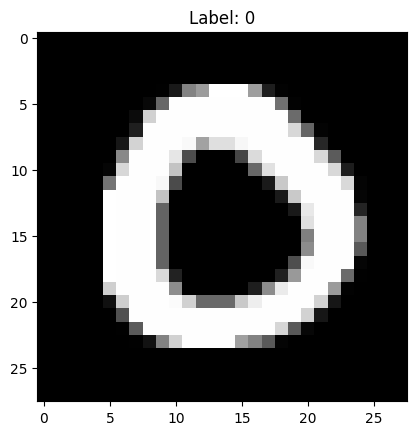

In [15]:
plt.imshow(X[i].reshape(28, 28), cmap='gray')
plt.title(f"Label: {y[i]}")
